## [Tutorial] Support Vector Machines (SVM) 

* 본 Tutorial은 고려대학교 산업경영공학부 강필성 교수님의 대학원 수업인 Business Analytics 강의 중 SVM 관련 내용을 담고 있습니다. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import random
import mglearn
import seaborn as sns
import time
from ipywidgets import interact, fixed, widgets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs, make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

### 🖍️ 간단한 예시 
- 우선 가장 간단하게 X (단변량), y로 이루어진 데이터셋을 이용하여 SVM이 어떤 식으로 적용이 되는지 살펴보도록 하겠습니다.

#### Step 1 : 데이터셋 생성
- scikit-learn의 _make blobs_ 함수를 이용하여 가상 데이터를 생성한다
- make_blobs 함수
    - n_samples : 표본 데이터의 수
    - n_features : 독립 변수의 수
    - centers : 생성할 클러스터의 수
    - cluster_std : 클러스터의 표준 편차 

In [2]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 42, cluster_std = 1.5)

In [3]:
# Add a bias to the X1 vector
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X
print(X_bias.shape)

(100, 3)


- y는 다음과 같이 0과 1의 값으로 이루어진 것을 확인할 수 있습니다

In [4]:
print(y.shape)
y

(100,)


array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

- 데이터셋의 분포를 보면 크게 두가지로 클러스터로 구분되어 있는 모습을 확인할 수 있습니다.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, shuffle=True)

In [6]:
print('X_train : \n', X_train[:5], '\n')
print('X_test : \n', X_test[:5], '\n')
print('y_train : \n', y_train[:5], '\n')
print('y_test : \n', y_test[:5])

X_train : 
 [[ 2.78445277e+00 -7.51523569e-03]
 [-2.06501721e+00  9.40586904e+00]
 [-2.68267005e+00  8.56263058e+00]
 [ 5.42279118e+00  2.41864669e+00]
 [-3.52458062e+00  9.93180056e+00]] 

X_test : 
 [[-3.87123374  6.89583058]
 [ 5.17655988  2.81434647]
 [-3.20015578 10.59996947]
 [-0.29235656  8.2368808 ]
 [ 4.27179666  0.84256544]] 

y_train : 
 [1 0 0 1 0] 

y_test : 
 [0 1 0 0 1]


In [7]:
clf = SVC(kernel = 'linear', C = 1000, random_state = 42)
clf.fit(X_train, y_train)

SVC(C=1000, kernel='linear', random_state=42)

In [8]:
print("w", clf.coef_[0])
print("slope",-clf.coef_[0][0]/clf.coef_[0][1])
print("intercept", clf.intercept_[0])

w [ 0.32264166 -0.19430204]
slope 1.6605160816480882
intercept 0.8072277720287779


In [9]:
# test set에 대해 예측 진행
y_pred=clf.predict(X_test)

In [10]:
# metric 산출
print('Model accuracy score with Linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with Linear kernel and C=1000.0 : 1.0000


In [11]:
def plot_svc_boundary(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 모델을 평가하기 위해 grid를 그림
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

    # 데이터의 구조를 맞춰줌
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # 모델에 기반한 decision boundary를 얻어옴
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary를 plot한다
    ax.contour(X,Y,P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
        s = 100, linewidth = 2, facecolors = 'none', edgecolors = 'k');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [12]:
print(clf.support_vectors_[:, 0])
print(clf.support_vectors_[:, 1])

[-1.27538025  1.76172201  4.24289359]
[7.18302065 1.93339887 6.05342343]


In [13]:
len(clf.support_vectors_)

3

Text(0.5, 1.0, 'SVM (Support Vector Machine)')

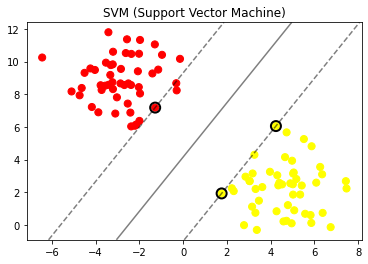

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_boundary(clf)
plt.title("SVM (Support Vector Machine)")

- 위의 결과에서 다음과 같이 plot을 그렸을 때, 3개의 support vector가 형성이 되고 있고, margin으로 표현되는 구간안에는 데이터가 존재하지 않는 모습을 볼 수 있습니다. 현재 linear kernel을 이용하였는데, make_blobs를 이용하여 생성된 데이터셋은 해당 kernel로 잘 분류되고 있는 모습을 확인할 수 있습니다.

### 🖍️ 다양한 데이터셋을 이용한 실험
- 간단한 예시를 통해 어떻게 SVM이 적용될 수 있는지 살펴보았습니다. 하지만 X와 y변수가 단순히 숫자형으로 이루어져서 그런지 결과물이 잘 와닿지 않습니다. 그렇다면 이번에는 좀더 직관적인 데이터셋을 이용하여 SVM을 적용시켜 보도록 하겠습니다. 

#### 📂 **[데이터셋] : Star Dataset for Stellar Classification** 
- Star의 몇몇 feature들을 포함하고 있는 데이터셋 : [download](https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs)
- _TargetClass_ : Star가 Dwarf(0)인지 Giant(1)인지에 대한 라벨
- _B-V_ : color index
- _Amag_ : Star의 절대적 크기

#### Step 1: 데이터셋 불러오기

In [15]:
data = '../data/Star3642_balanced.csv'
star = pd.read_csv(data)
star.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [16]:
colnames = star.columns
colnames

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

/home/sunwookim/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

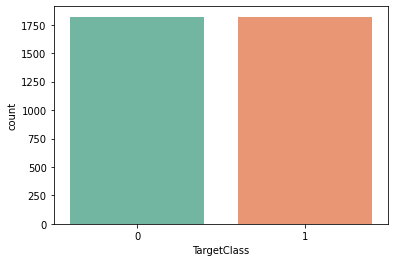

In [17]:
sns.countplot(star['TargetClass'], palette = 'Set2')

- 다음과 같이 target label의 경우에는 balance된 형태로 target 분포가 이루어진 것을 확인할 수 있었습니다

In [18]:
# 데이터셋에 대한 요약을 확인합니다
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [19]:
# 결측치 확인
star.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [20]:
X = star.drop(['TargetClass', 'SpType'], axis=1)
y = star['TargetClass']
X.head()

,Vmag,Plx,e_Plx,B-V,Amag
0,5.99,13.73,0.58,1.318,16.678352
1,8.70,2.31,1.29,-0.045,15.518060
2,5.77,5.50,1.03,0.855,14.471813
3,6.72,5.26,0.74,-0.015,15.324928
4,8.76,13.44,1.16,0.584,19.401997


In [21]:
y

0       0
1       0
2       0
3       1
4       1
       ..
3637    0
3638    1
3639    0
3640    1
3641    0
Name: TargetClass, Length: 3642, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((2549, 5), (1093, 5))

- 데이터에 대한 scaling을 진행하고 train, test 데이터로 나누어 줍니다

In [23]:
colnames = X.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[colnames])
X_test = pd.DataFrame(X_test, columns=[colnames])

In [24]:
X_train

,Vmag,Plx,e_Plx,B-V,Amag
0,-0.965267,-0.480889,-0.474527,-1.780168,-1.374673
1,-0.168740,-0.408879,-0.203691,0.910813,-0.578879
2,-2.201782,0.163857,-0.460985,1.288414,-0.541180
3,-1.678349,1.238993,-0.284942,-0.961273,0.524968
4,-1.875585,-0.271556,-0.623487,-2.144122,-1.082617
...,...,...,...,...,...
2544,0.764336,-0.413065,0.365066,0.508189,-0.081545
2545,-0.009434,-0.437348,-0.515153,1.154207,-0.615770
2546,-0.343217,-0.382921,-0.393276,1.684214,-0.574599
2547,-0.502523,-0.167727,-0.163065,0.251147,-0.094616


In [25]:
X_train.describe()

,Vmag,Plx,e_Plx,B-V,Amag
count,2.549000e+03,2.549000e+03,2.549000e+03,2.549000e+03,2.549000e+03
mean,1.449518e-16,-8.362606e-18,8.083852e-17,1.672521e-16,-2.648158e-17
std,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00
min,-4.644467e+00,-1.031017e+00,-9.349493e-01,-2.262407e+00,-5.591844e+00
25%,-5.707965e-01,-4.063667e-01,-4.203598e-01,-7.770216e-01,-5.389421e-01
50%,1.953873e-01,-2.255028e-01,-1.630651e-01,1.010162e-01,-2.509625e-02
75%,7.036479e-01,9.100915e-02,1.483970e-01,6.992647e-01,6.609989e-01
max,3.222193e+00,2.283716e+01,2.851853e+01,3.867935e+00,5.372094e+00


In [26]:
y_test

415     0
3252    0
3193    1
298     0
1874    0
       ..
168     1
3377    0
962     1
945     0
462     0
Name: TargetClass, Length: 1093, dtype: int64

#### Step 2 : model fit

In [27]:
clf = SVC(kernel = 'linear', C = 1000, random_state = 42)
clf.fit(X_train, y_train)

SVC(C=1000, kernel='linear', random_state=42)

#### Step 3 : test 데이터셋을 이용한 예측

In [28]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

#### Step 4 : metric을 이용한 평가

In [29]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8988
Test set score: 0.8911


#### 🔎 **Hyper-parameter search**
-----

- 이번에는 hyper-parameter search를 통해 해당 값에 따라 어떤 식으로 결과에 영향을 미치는지 직접 확인해보도록 하겠습니다
- GridSearchCV를 이용하여 다양한 kernel의 종류와 parameter에 대한 결과를 확인할 수 있습니다

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC() 

# hyperparameter tuning을 위한 parameter 지정
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01, 0.02, 0.03, 0.04, 0.05]} ]

In [31]:
#GridSearch를 이용한 Cross Validation을 실시한다
grid_search = GridSearchCV(estimator = svc, param_grid = parameters, scoring = 'accuracy', cv = 5, verbose=0)

In [32]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [33]:
estimator = grid_search.best_estimator_
y_pred = estimator.predict(X_test)
print(grid_search.best_params_)
print("Accuracy: " ,round(accuracy_score(y_test, y_pred),4))

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
Accuracy:  0.893


- 두개의 class를 가지는 target에 대해 각각의 metric (precision, recall, f1-score) 을 나타내보면 다음과 같습니다

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       540
           1       0.90      0.89      0.89       553

    accuracy                           0.89      1093
   macro avg       0.89      0.89      0.89      1093
weighted avg       0.89      0.89      0.89      1093



- rbf kernel이 가장 성능이 높게 나오고 있음을 확인할 수 있으며 이는 rbf kernel 자체의 특성과 연관시켜 생각해볼 수 있습니다. rbf kernel은 특정 샘플을 랜드마크로 정하여 각 샘플이 랜드마크와 얼마나 유사한지를 보고 구하기 때문에 결정경계에 있어 효과적이라고 할 수 있습니다. 추가적으로 앞서 EDA를 진행했을 때 target값이 0일 때와 1일 때의 비율이 비슷하였기 때문에 성능도 비슷하게 나왔음을 확인할 수 있습니다.

#### 💭 **심도있는 result analysis**
---
- 이번에는 여러 kernel의 종류, parameter값들에 대해 좀더 심도있는 분석을 진행하고자 합니다

In [35]:
# 데이터프레임으로 만들기 위한 열값들을 받아옵니다
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'param_gamma', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [36]:
# 각각의 kernel 종류, parameter에 따른 score값들을 dataframe으로 만듭니다
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'param_gamma', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028970,0.005857,0.003562,0.000057,1,linear,NaN,NaN,"{'C': 1, 'kernel': 'linear'}",0.892157,0.901961,0.898039,0.886275,0.911591,0.898005,0.008626,23
1,0.059557,0.004685,0.003545,0.000072,10,linear,NaN,NaN,"{'C': 10, 'kernel': 'linear'}",0.892157,0.901961,0.898039,0.886275,0.913556,0.898397,0.009258,21
2,0.247866,0.028232,0.003705,0.000109,100,linear,NaN,NaN,"{'C': 100, 'kernel': 'linear'}",0.892157,0.901961,0.898039,0.886275,0.913556,0.898397,0.009258,21
3,0.032675,0.000898,0.010143,0.000215,1,rbf,0.1,NaN,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.894118,0.907843,0.901961,0.886275,0.915521,0.901143,0.010225,8
4,0.034017,0.001270,0.010089,0.000216,1,rbf,0.2,NaN,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",0.894118,0.907843,0.901961,0.884314,0.915521,0.900751,0.010808,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.065869,0.005174,0.012365,0.000182,100,poly,0.01,4,"{'C': 100, 'degree': 4, 'gamma': 0.01, 'kernel...",0.531373,0.521569,0.517647,0.515686,0.524558,0.522166,0.005536,69
71,0.059913,0.003830,0.011862,0.000157,100,poly,0.02,4,"{'C': 100, 'degree': 4, 'gamma': 0.02, 'kernel...",0.594118,0.564706,0.560784,0.550980,0.563851,0.566888,0.014462,61
72,0.064001,0.004065,0.011390,0.000123,100,poly,0.03,4,"{'C': 100, 'degree': 4, 'gamma': 0.03, 'kernel...",0.621569,0.645098,0.625490,0.707843,0.648330,0.649666,0.030923,57
73,0.061203,0.002028,0.010863,0.000070,100,poly,0.04,4,"{'C': 100, 'degree': 4, 'gamma': 0.04, 'kernel...",0.643137,0.664706,0.645098,0.701961,0.679764,0.666933,0.022089,54


In [37]:
# 각 kernel의 종류에 따라 데이터프레임을 분류한다
linear_scores = scores_df[scores_df.param_kernel == 'linear']
rbf_scores = scores_df[scores_df.param_kernel == 'rbf']
poly_scores = scores_df[scores_df.param_kernel == 'poly']
linear_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028970,0.005857,0.003562,0.000057,1,linear,NaN,NaN,"{'C': 1, 'kernel': 'linear'}",0.892157,0.901961,0.898039,0.886275,0.911591,0.898005,0.008626,23
1,0.059557,0.004685,0.003545,0.000072,10,linear,NaN,NaN,"{'C': 10, 'kernel': 'linear'}",0.892157,0.901961,0.898039,0.886275,0.913556,0.898397,0.009258,21
2,0.247866,0.028232,0.003705,0.000109,100,linear,NaN,NaN,"{'C': 100, 'kernel': 'linear'}",0.892157,0.901961,0.898039,0.886275,0.913556,0.898397,0.009258,21


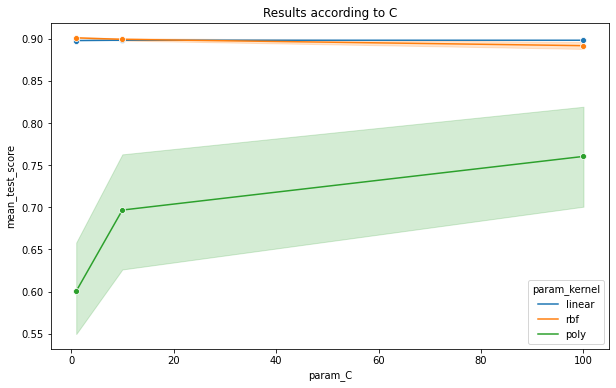

In [38]:
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor('white')
sns.lineplot(data = scores_df, x = 'param_C', y = 'mean_test_score', hue = 'param_kernel', marker = 'o')
plt.title('Results according to C') 
plt.show()

- C에 따른 영향력을 보았을 때, polynomial kernel에서 해당 파라미터에 따른 성능 변화가 두드러짐을 확인할 수 있었습니다. 이는 polynomial kernel에서 다항 차원을 이용하기 때문에 penalty term에 따른 효과가 큰 것으로 해석할 수 있습니다.

#### 🔎 **Scaling의 영향**
-----
- 이번에는 scaling의 영향을 한번 살펴보고자 합니다
- SVM은 데이터의 scale에 민감하다는 내용을 일전에 본 적이 있는데 정말 그러한지 확인해보도록 하겠습니다

- Scaler는 다음과 같이 3가지를 이용합니다
    1. Standard Scaler : 기존 변수를 정규 분포로 변환
    2. MinMax scaler : 데이터의 값들을 0~1 사이의 값으로 변환
    3. Robust scaler : 중위수 (median) 과 IQR (사분위수) 를 이용하여 변환

> ### 가정 : Scaling을 진행하게 되면 진행하지 않았을 시보다 성능 향상이 있을 것이다
다음과 같이 가정을 설정하고 실험을 진행해보도록 하겠습니다

#### Step 01 : scaler를 이용한 scaling 진행

In [39]:
# 각각의 scaler를 이용하여 fit 및 transform을 해줍니다
scaler1 = StandardScaler()
X_train_sc = scaler1.fit_transform(X_train)
X_test_sc = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
X_train_mm = scaler2.fit_transform(X_train)
X_test_mm = scaler2.transform(X_test)

scaler3 = RobustScaler()
X_train_rb  = scaler3.fit_transform(X_train)
X_test_rb = scaler3.transform(X_test)

#### Step 02 : model fitting
- 기본 파라미터로 설정되어 있는 SVC 함수를 이용하여 model fitting을 진행합니다

In [40]:
clf0 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf0.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [41]:
clf1 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf1.fit(X_train_sc, y_train)

SVC(kernel='linear', random_state=42)

In [42]:
clf2 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf2.fit(X_train_mm, y_train)

SVC(kernel='linear', random_state=42)

In [43]:
clf3 = SVC(kernel = 'linear', C = 1.0, random_state = 42)
clf3.fit(X_train_rb, y_train)

SVC(kernel='linear', random_state=42)

#### Step 03 : test 데이터셋을 이용한 예측

In [44]:
y_pred = clf0.predict(X_test)
y_pred_sc = clf1.predict(X_test_sc)
y_pred_mm = clf2.predict(X_test_mm)
y_pred_rb = clf3.predict(X_test_rb)

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    plt.figure(figsize=(10,5))
    roc_score = roc_auc_score(y_test, y_pred_test)
    plt.plot(fpr, tpr, linewidth = 2)
    plt.text(0.8, 0.7, 'ROC AUC : {:.4f}'.format(roc_score), size = 12)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('[Result] ROC curve')
    plt.xlabel('FPR (1 - Specificity)')
    plt.ylabel('TPR (Sensitivity)')
    return plt

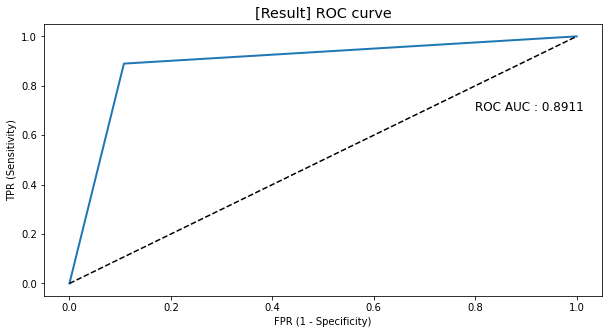

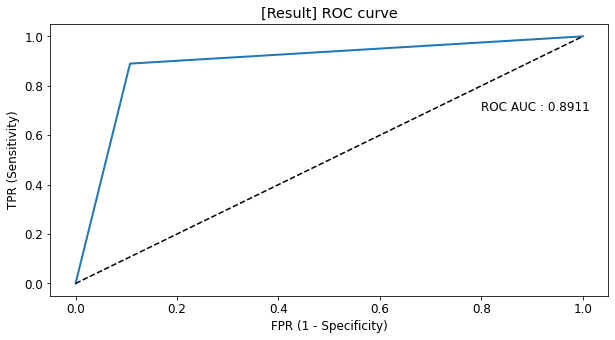

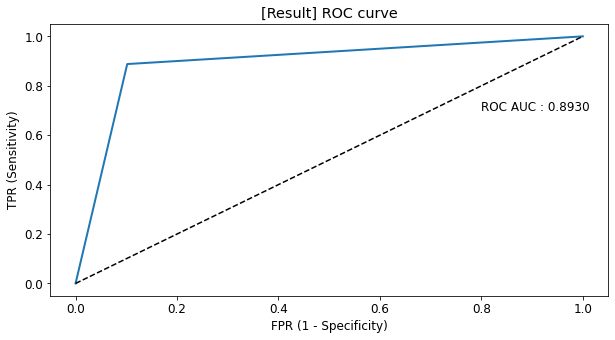

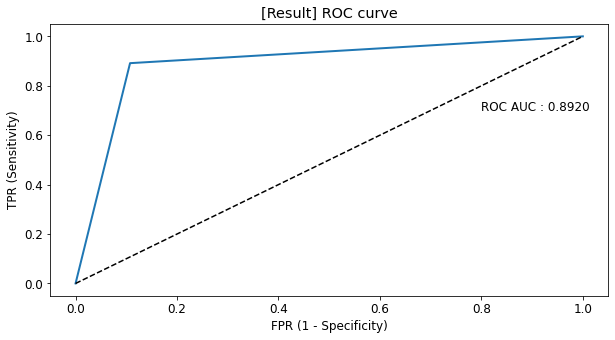

In [46]:
plt0 = plot_roc_curve(y_test, y_pred)
plt1 = plot_roc_curve(y_test, y_pred_sc)
plt2 = plot_roc_curve(y_test, y_pred_mm)
plt3 = plot_roc_curve(y_test, y_pred_rb)

In [47]:
from sklearn import metrics
print("[Normal] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred))
print("[Standard Scaler] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred_sc))
print("[MinMax scaler] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred_mm))
print("[Robust scaler] Accuracy score %.4f" %metrics.accuracy_score(y_test, y_pred_rb))

[Normal] Accuracy score 0.8911
[Standard Scaler] Accuracy score 0.8911
[MinMax scaler] Accuracy score 0.8930
[Robust scaler] Accuracy score 0.8920


|SCALE|일반|Standard Scaler|Minmax Scaler|Robust Scaler|
|:--:|:--:|:--:|:--:|:--:|
|Accuracy|0.8911|0.8911|0.8930|0.8920|

- scaling을 진행하지 않은 경우에는 0.8911, standardscaler를 이용한 경우 0.8911, MinMaxScaler를 이용한 경우 0.8930, Robust scaler를 이용한 경우 0.8920으로 약강의 성능 향상이 있긴 했으나 생각보다 크게 차이가 많이 나지 않는 모습을 보였습니다. 데이터 자체의 분포에서 taget이 많이 balancing 되어있었기 때문에 이러한 결과가 나타난 것으로 생각됩니다.

#### 🗂️ **Kernel Trick**
-------------
- 선형으로 분리할 수 없는 점들을 분류하기 위해 커널(kernel)을 이용함
- 커널 트릭(Kernel Trick; ϕ)을 이용하여 고차원 공간(high dimensional space)으로 매핑함
- 고차원 공간에서는 저차원 공간에서보다 쉽게 linear separable한 line을 구할 수 있음
- 알고리즘에 이용되는 kernel 종류 : (polynomial, RBF, sigmoid) kernel

##### ✅ **Linear kernel**
- 일반적인 선형 kernel을 이용함
- parameter
    - **C** : error term의 penalty parameter로 이용 (training error를 얼만큼 허용할 것인지)

In [48]:
def plot_svm_c(c = 0.01, ax=None):
    N = 100
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=c)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow', alpha = 0.5)
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_boundary(model, ax)

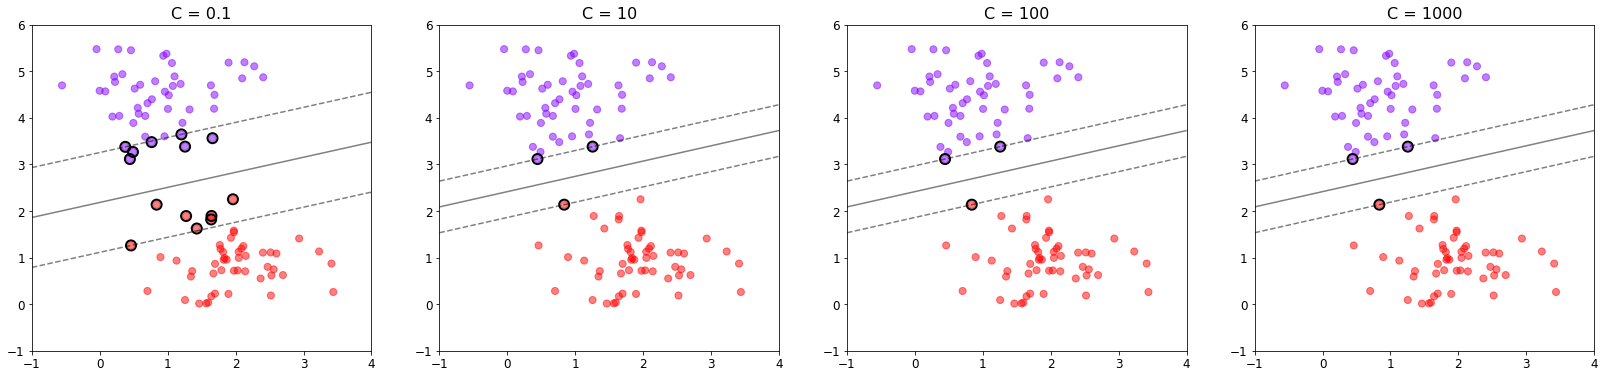

In [49]:
fig, ax = plt.subplots(1, 4, figsize=(28, 6))
for axi, c in zip(ax, [0.1, 10, 100, 1000]):
    plot_svm_c(c, axi)
    axi.set_title('C = {0}'.format(c), size = 16)

In [50]:
C = [0.1, 1, 10, 100, 1000]

list = []

for c in C:
    kernel=SVC(kernel = 'linear', C = c)
    kernel.fit(X_train, y_train)
    list.append([c, kernel.score(X_test,y_test)])
lin_sc = pd.DataFrame(list, columns = ['C', 'accuracy'])
lin_sc

,C,accuracy
0,0.1,0.891125
1,1.0,0.891125
2,10.0,0.891125
3,100.0,0.891125
4,1000.0,0.891125


- SVM에서 parameter C는 주로 error term에 대한 penalty parameter로 쓰게 됩니다. 위의 그래프에서 C의 값이 커짐에 따라 hard margin이 형성되고 margin안에 많은 점이 허용되지 않게 됩니다. 반면에 작은 C의 값을 가지게 되면 soft margin이 형성되게 되고 몇몇 점들이 margin안에 위치하는 것을 허용하게 됩니다. 하지만, linear kernel 이용시 위의 경우 C의 값에 따라 accuracy의 변화는 없는 점을 확인할 수 있습니다. 이는 그래프에서 확인할 수 있듯이 C를 통해 margin 안에 어느 정도의 데이터가 들어오는 것을 허용하는지 조절하고 있고, training example의 정확한 분류와 decision function의 margin 최대화 사이의 tradeoff 조절함에 있어 균형이 맞아 동일한 accuracy가 나오는 것으로 해석할 수 있습니다.

### 🔎 **비선형 데이터셋**
-------- 
- 다음으로는 비선형 데이터셋을 만들어 여러 종류의 kernel을 이용하여 parameter값을 바꾸어 가며 변화를 살펴봅니다.

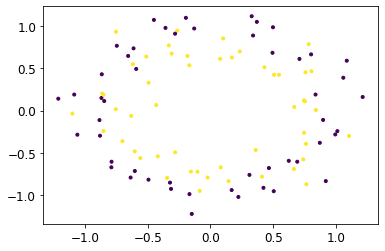

In [51]:
X, y = make_circles(n_samples=100, noise=0.13, random_state=42)
# show raw non-linear data
plt.scatter(X[:, 0], X[:, 1], c = y, marker='.')
plt.show()

- make_circles 함수를 이용하여 다음과 같이 비선형 데이터셋을 생성해 줍니다

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3, shuffle=True)

- train 데이터셋과 test 데이터셋으로 데이터셋을 나누어 줍니다

##### ✅ **Polynomial kernel**
- 다항식의 2차원 데이터를 다차원으로 바꾸어주는 커널 함수
$$ K(x,y) = (x \cdot y + c)^d , c>0$$
- parameter
    - **C** : error term의 penalty parameter로 이용 (training error를 얼만큼 허용할 것인지)
    - **degree** : 결정경계면의 flexibility를 조절함

In [53]:
C = [1, 10, 100, 1000]
D = [2, 3, 4]

poly_classifiers = []
list = []

for d in D:
    for c in C:
        kernel=SVC(kernel = 'poly', C = c, degree = d)
        kernel.fit(X_train, y_train)
        list.append([d, c, kernel.score(X_test,y_test)])
        poly_classifiers.append((c, d, kernel))
poly_sc = pd.DataFrame(list, columns = ['degree', 'C', 'accuracy'])
poly_sc

,degree,C,accuracy
0,2,1,0.666667
1,2,10,0.666667
2,2,100,0.733333
3,2,1000,0.733333
4,3,1,0.333333
5,3,10,0.333333
6,3,100,0.333333
7,3,1000,0.333333
8,4,1,0.600000
9,4,10,0.600000


/home/sunwookim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/home/sunwookim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/home/sunwookim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since

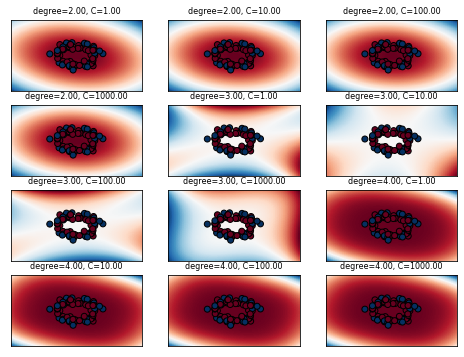

In [54]:
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (c, d, clf) in enumerate(poly_classifiers):
    # 그리드에 decision function을 평가함
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 파라미터에 대한 시각화
    plt.subplot(len(C), len(D), k + 1)
    plt.title("degree=%.2f, C=%.2f" % (d, c), size=8)

    # 파라미터의 영향 시각화
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

Text(0.5, 1.0, 'Polynomial kernel heatmap')

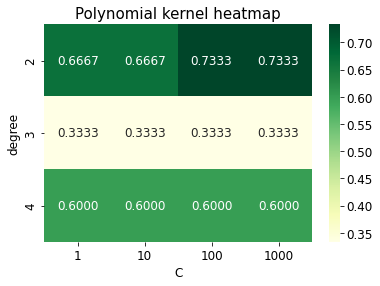

In [55]:
poly = poly_sc.pivot_table(index = 'degree', columns = 'C', values = 'accuracy')
sns.heatmap(poly, annot = True, fmt = '.4f', cmap = 'YlGn')
plt.title('Polynomial kernel heatmap', fontsize=15)

- polynomial kernel 이용시 degree별로 대부분의 accuracy값이 일정하게 나타나며, degree가 고정되어 있을 때, C의 영향력이 크지 않은 것으로 나타났습니다. 여기서 값이 높을수록 더 flexible한 boundary를 나타내는 degree의 영향력이 penalty term인 C의 영향력보다 컸다고 할 수 있으며, C = 100 또는 1000, degree = 2의 값을 가질 때, 0.7333으로 가장 높은 accuracy값을 보였음을 알 수 있습니다. polynomial kernel을 쓰는 경우 nonlinear decision boundary를 잘 형성할 수 있기 때문에 이때, flexible한 boundary 생성을 조절하는 degree의 영향력이 컸을 것이라고 말할 수 있습니다.

##### ✅ **RBF (Gaussian Radial Basis Function) kernel**
- 2차원의 데이터를 무한 차원으로 바꿔주는 커널 함수
$$ K(x, y) = exp(- \frac {\|x - y\|^2}{2 \sigma^2}) , \sigma \neq 0$$
- parameter
    - **C** : error term의 penalty parameter로 이용 (training example의 정확한 분류와 decision function의 margin 최대화 사이의 tradeoff 조절)
    - **gamma** : 결정경계면을 얼마나 유연하게 그려줄 것인지 (각 training 데이터의 영향력이 얼만큼 미칠지)

In [56]:
C = [1, 10, 100]
G = [0.1, 1, 10, 100]

list = []
classifiers = []

for c in C:
    for g in G:
        kernel=SVC(kernel = 'rbf', C = c, gamma = g)
        kernel.fit(X_train, y_train)
        list.append([g, c, kernel.score(X_test,y_test)])
        classifiers.append((c, g, kernel))
rbf_sc = pd.DataFrame(list, columns = ['gamma', 'C', 'accuracy'])
rbf_sc

,gamma,C,accuracy
0,0.1,1,0.333333
1,1.0,1,0.500000
2,10.0,1,0.533333
3,100.0,1,0.400000
4,0.1,10,0.433333
5,1.0,10,0.666667
6,10.0,10,0.566667
7,100.0,10,0.466667
8,0.1,100,0.666667
9,1.0,100,0.566667


Text(0.5, 1.0, 'RBF kernel heatmap')

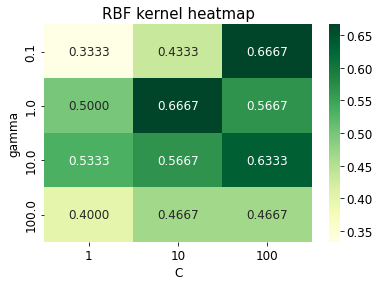

In [57]:
rbf = rbf_sc.pivot_table(index = 'gamma', columns = 'C', values = 'accuracy')
sns.heatmap(rbf, annot = True, fmt = '.4f', cmap = 'YlGn')
plt.title('RBF kernel heatmap', fontsize=15)

- 결과를 살펴보자면 rbf kernel 이용시 (C = 10, gamma = 1), (C = 100, gamma = 0.1)일 때 accuracy값이 0.6667로 가장 높았습니다. 또한 gamma값이 고정되어 있을 때, C값이 커짐에 따라 accuracy가 증가하는 모습을 살펴볼 수 있었습니다. 

/home/sunwookim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/home/sunwookim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/home/sunwookim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since

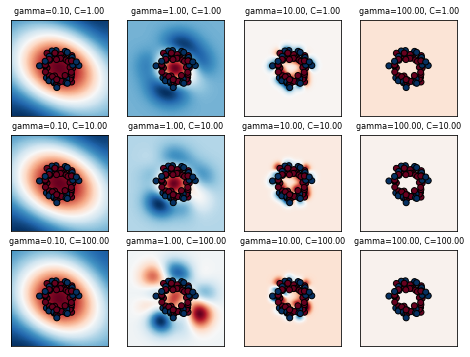

In [58]:
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (c, g, clf) in enumerate(classifiers):
    # 그리드에 decision function을 평가함
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 파라미터에 대한 시각화
    plt.subplot(len(C), len(G), k + 1)
    plt.title("gamma=%.2f, C=%.2f" % (g, c), size=8)

    # 파라미터의 영향 시각화
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

- RBF kernel의 경우 gaussian distribution의 유사도를 이용하기 때문에 C와 gamma값에 따라 variance에 영향을 많이 주고, 결론적으로 성능에도 차이가 나타나는 것으로 해석할 수 있습니다.

##### ✅ **Sigmoid kernel**
$$ K(x,y) = tanh(a(x \cdot y + b)), a,b \ge 0 $$
- **C** : error term의 penalty parameter로 이용
- **gamma** : 결정경계면을 얼마나 유연하게 그려줄 것인지 
- **degree** : 결정경계면의 flexibility를 조절함

In [59]:
C = [1, 10, 100]
G = [0.1, 1, 10, 100]
D = [2, 3, 4]

sig_classifiers = []
list = []

for g in G:
    for c in C:
        for d in D:
            kernel=SVC(kernel = 'sigmoid', C = c, gamma = g, degree = d)
            kernel.fit(X_train, y_train)
            list.append([g, c, d,  kernel.score(X_test,y_test)])
            sig_classifiers.append((c, g, d, kernel))
sigmoid_sc = pd.DataFrame(list, columns = ['gamma', 'C', 'degree', 'accuracy'])
sigmoid_sc

,gamma,C,degree,accuracy
0,0.1,1,2,0.333333
1,0.1,1,3,0.333333
2,0.1,1,4,0.333333
3,0.1,10,2,0.333333
4,0.1,10,3,0.333333
5,0.1,10,4,0.333333
6,0.1,100,2,0.333333
7,0.1,100,3,0.333333
8,0.1,100,4,0.333333
9,1.0,1,2,0.333333


Text(0.5, 1.0, 'Sigmoid kernel heatmap')

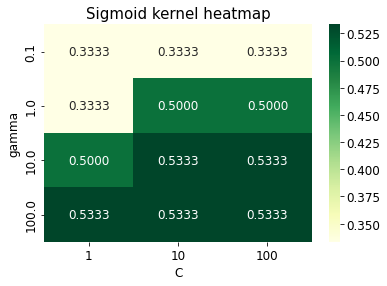

In [60]:
sig = sigmoid_sc.pivot_table(index = 'gamma', columns = 'C', values = 'accuracy')
sns.heatmap(sig, annot = True, fmt = '.4f', cmap = 'YlGn')
plt.title('Sigmoid kernel heatmap', fontsize=15)

- 우선 전반적으로 gamma값과 C의 값이 증가함에 따라 accuracy가 향상되는 결과를 확인할 수 있었습니다. C = 1일 때, gamma의 변화에 따라 비교적 성능 향상이 뚜렷한 것으로 보아 C값이 작을 때, gamma의 영향력이 비교적 크다고 해석할 수 있습니다.

Text(0.5, 1.0, 'Sigmoid kernel heatmap')

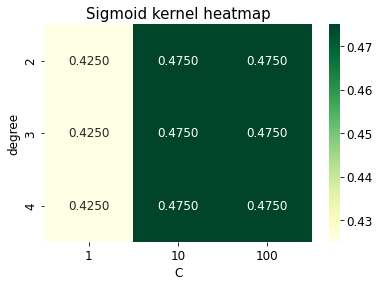

In [61]:
sig = sigmoid_sc.pivot_table(index = 'degree', columns = 'C', values = 'accuracy')
sns.heatmap(sig, annot = True, fmt = '.4f', cmap = 'YlGn')
plt.title('Sigmoid kernel heatmap', fontsize=15)

- 위의 결과에서 C값이 일정한 경우에 degree에 따른 성능 변화가 없음을 확인할 수 있었습니다. Sigmoid kernel의 경우 활성화 함수와 유사한 형태라고 볼 수 있기에 error term에 대한 penalty parameter의 영향력이 더 크다고 말할 수 있습니다.

Text(0.5, 1.0, 'Sigmoid kernel heatmap')

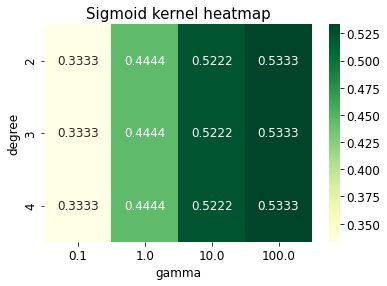

In [62]:
sig = sigmoid_sc.pivot_table(index = 'degree', columns = 'gamma', values = 'accuracy')
sns.heatmap(sig, annot = True, fmt = '.4f', cmap = 'YlGn')
plt.title('Sigmoid kernel heatmap', fontsize=15)

- 위의 결과에서 gamma값에 따라 성능이 일정함을 확인할 수 있습니다. 높은 gamma값을 가질 때, 결정경계면 가까이 있는 점들이 더 고려되며 좋은 결정경계면을 생성하였다고 해석할 수 있습니다.

- parameter값에 따른 variance와 bias의 변화는 다음과 같이 정리할 수 있습니다

|**Parameter**|큰 gamma|작은 gamma|큰 C|작은 C|
|:--:|:--:|:--:|:--:|:--:|
|**Variance**|낮음|높음|높음|낮음|
|**Bias**|높음|낮음|낮음|높음|

#### **🗂️ SVM의 장단점**
---
- 장점 
    - 다양한 feature값을 가지는 데이터셋에 효과적
    - decision function에 있어 여러 종류의 kernel function 사용 가능

- 단점 
    - feature들의 수가 데이터 수보다 클 때 over-fitting을 방지하기 위해 kernel function과 regularization term을 적절히 고르는게 필수적
    -  training 시간이 오래 걸리기 때문에 작은 sample set에 잘 작동함
    - 예측이 어떻게 결정되었는지 이해하고 어려움

#### Reference
---
- https://www.sallys.space/blog/2018/05/30/svm/
- https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html